In [5]:
!pip install kaggle
!pip install wordcloud

In [6]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"praneethratna","key":"1ffc3d4eb8d9e2d8b123587bece7ff97"}'}

In [7]:
!mkdir ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [8]:
!kaggle datasets download -d quora/question-pairs-dataset
import shutil
shutil.unpack_archive('question-pairs-dataset.zip')

100% 20.8M/20.8M [00:00<00:00, 30.5MB/s]



In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Input, Embedding, LSTM, Attention, Dense, BatchNormalization, Dropout, Add
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model
from keras.callbacks import ModelCheckpoint
from wordcloud import WordCloud

In [12]:
data = pd.read_csv('questions.csv')
data.describe()

,id,qid1,qid2,is_duplicate
count,404351.000000,404351.000000,404351.000000,404351.000000
mean,202175.000000,391840.987691,390195.973765,0.369248
std,116726.223686,228430.857607,228803.645742,0.482602
min,0.000000,1.000000,2.000000,0.000000
25%,101087.500000,193381.000000,191012.000000,0.000000
50%,202175.000000,390630.000000,388364.000000,0.000000
75%,303262.500000,589514.000000,588071.000000,1.000000
max,404350.000000,789800.000000,789801.000000,1.000000


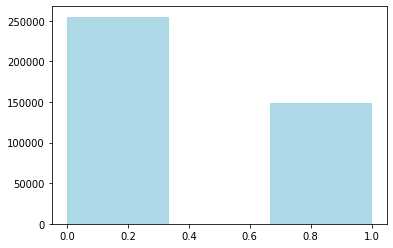

In [13]:
q1 = list(data['question1'].astype(str))
q2 = list(data['question2'].astype(str))
target = np.array(data['is_duplicate'])
plt.hist(target, color = 'lightblue', bins = 3)
plt.show()

In [14]:
tokenizer = Tokenizer(lower=True)
tokenizer.fit_on_texts(q1+q2)
word_index = tokenizer.word_index

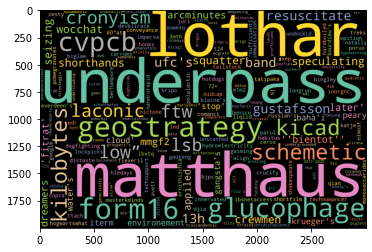

In [15]:
wordcloud = WordCloud(width = 3000, height = 2000,
                      random_state=1, background_color='black', colormap='Set2', collocations=False).generate_from_frequencies(word_index)
plt.imshow(wordcloud)                      

In [16]:
def padding(texts):
  sequences = tokenizer.texts_to_sequences(texts)
  padded = pad_sequences(sequences,maxlen=30,padding='pre')
  return padded
padded1 = padding(q1)
padded2 = padding(q2)

In [11]:
embedding_dim = 300
vocab = len(word_index)
x = Input(shape=(30,))
y = Input(shape=(30,))
emb1 = Embedding(vocab, embedding_dim, mask_zero = True)(x)
emb1 = LSTM(embedding_dim)(emb1)
emb2 = Embedding(vocab, embedding_dim, mask_zero = True)(y)
emb2 = LSTM(embedding_dim)(emb2)
z = Attention(dropout=0.2)([emb1, emb2])
z = BatchNormalization()(z)
z = Dense(200)(z)
z = Dropout(0.2)(z)
z = Dense(1,activation='sigmoid')(z)

In [12]:
model = Model(inputs = [x,y], outputs = z)
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 30)]         0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 30)]         0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 30, 300)      28680900    input_1[0][0]                    
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 30, 300)      28680900    input_2[0][0]                    
______________________________________________________________________________________________

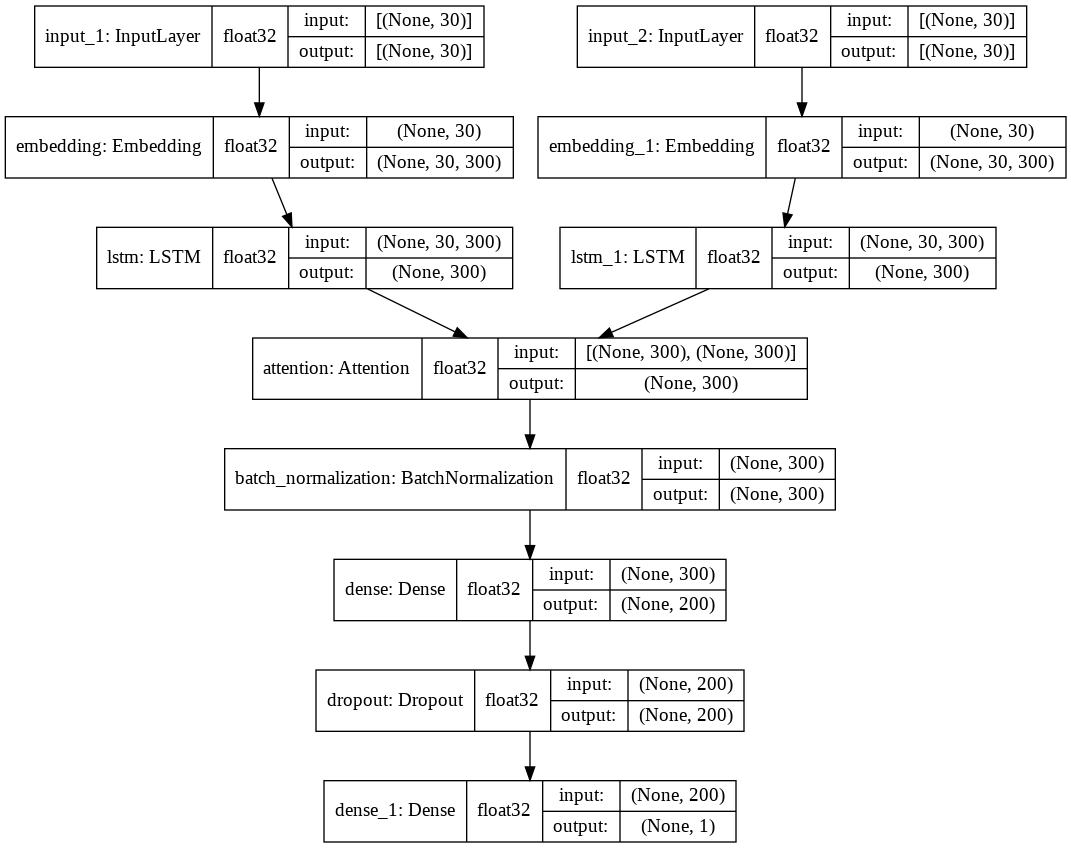

In [13]:
plot_model(model,to_file='model.jpeg',show_shapes=True,show_dtype=True)

In [ ]:
cp_callback = ModelCheckpoint('model.save', monitor='loss', mode='min', save_best_only=True)
model.compile(optimizer = Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['acc'])
history = model.fit(x=[padded1,padded2],y=(target).reshape(target.shape[0], 1),epochs=10,batch_size = 1024, verbose=1,callbacks=[cp_callback])

Epoch 1/10
395/395 [==============================] - 87s 204ms/step - loss: 0.5343 - acc: 0.7332


INFO:tensorflow:Assets written to: model.save/assets


INFO:tensorflow:Assets written to: model.save/assets


Epoch 2/10
395/395 [==============================] - 81s 205ms/step - loss: 0.4681 - acc: 0.7747


INFO:tensorflow:Assets written to: model.save/assets


INFO:tensorflow:Assets written to: model.save/assets


Epoch 3/10
395/395 [==============================] - 81s 205ms/step - loss: 0.4241 - acc: 0.7961


INFO:tensorflow:Assets written to: model.save/assets


INFO:tensorflow:Assets written to: model.save/assets


Epoch 4/10
395/395 [==============================] - 81s 206ms/step - loss: 0.3886 - acc: 0.8119


INFO:tensorflow:Assets written to: model.save/assets


INFO:tensorflow:Assets written to: model.save/assets


Epoch 5/10
395/395 [==============================] - 81s 206ms/step - loss: 0.3568 - acc: 0.8265


INFO:tensorflow:Assets written to: model.save/assets


INFO:tensorflow:Assets written to: model.save/assets


Epoch 6/10
395/395 [==============================] - 81s 206ms/step - loss: 0.3277 - acc: 0.8412


INFO:tensorflow:Assets written to: model.save/assets


INFO:tensorflow:Assets written to: model.save/assets


Epoch 7/10
395/395 [==============================] - 81s 204ms/step - loss: 0.3010 - acc: 0.8550


INFO:tensorflow:Assets written to: model.save/assets


INFO:tensorflow:Assets written to: model.save/assets


Epoch 8/10
395/395 [==============================] - 80s 203ms/step - loss: 0.2768 - acc: 0.8677


INFO:tensorflow:Assets written to: model.save/assets


INFO:tensorflow:Assets written to: model.save/assets


Epoch 9/10
395/395 [==============================] - 80s 202ms/step - loss: 0.2556 - acc: 0.8794


INFO:tensorflow:Assets written to: model.save/assets


INFO:tensorflow:Assets written to: model.save/assets


Epoch 10/10
395/395 [==============================] - 80s 202ms/step - loss: 0.2348 - acc: 0.8906


INFO:tensorflow:Assets written to: model.save/assets


INFO:tensorflow:Assets written to: model.save/assets


In [ ]:
shutil.make_archive('model','zip','/content/model.save')
files.download('/content/model.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [10]:
shutil.unpack_archive('/content/drive/MyDrive/model (1).zip', '/content/model.save')

In [11]:
model = load_model('model.save')

In [59]:
q = [['What is the shipping time?'], ['How long does delivery take?']]
padded1 = padding(q[0])
padded2 = padding(q[1])

In [60]:
prediction = model.predict([padded1, padded2])
if prediction > 0.5:
  print("They are similar")
else:
  print("They are not similar")  

They are similar


In [61]:
prediction

array([[0.99907243]], dtype=float32)